### Import libraray

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### load dataset

In [ ]:
df = pd.read_excel("Sample Demand Data.xlsx")
df

,FlightDate,Cargo_Demand
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600
...,...,...
769,2020-03-27,6290.48158
770,2020-03-28,6534.48634
771,2020-03-29,4088.32328
772,2020-03-30,1941.32808


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [ ]:
df = df.set_index("FlightDate")

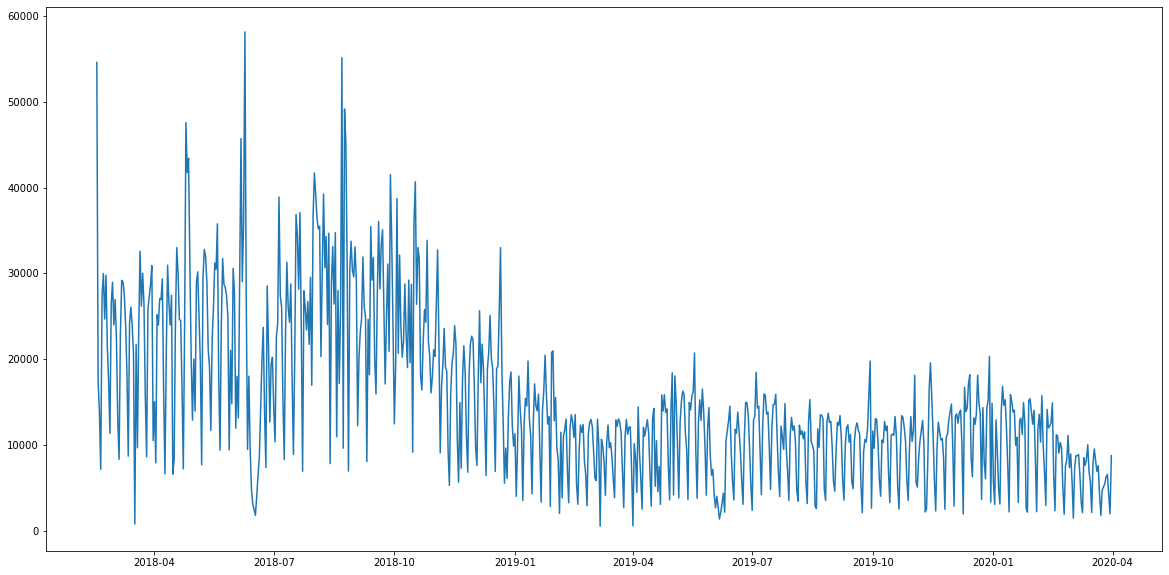

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(df)
plt.show()

## Check for sationary or non-stationary time series
#### - Rolling Stats
#### - Dickey-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.grid()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

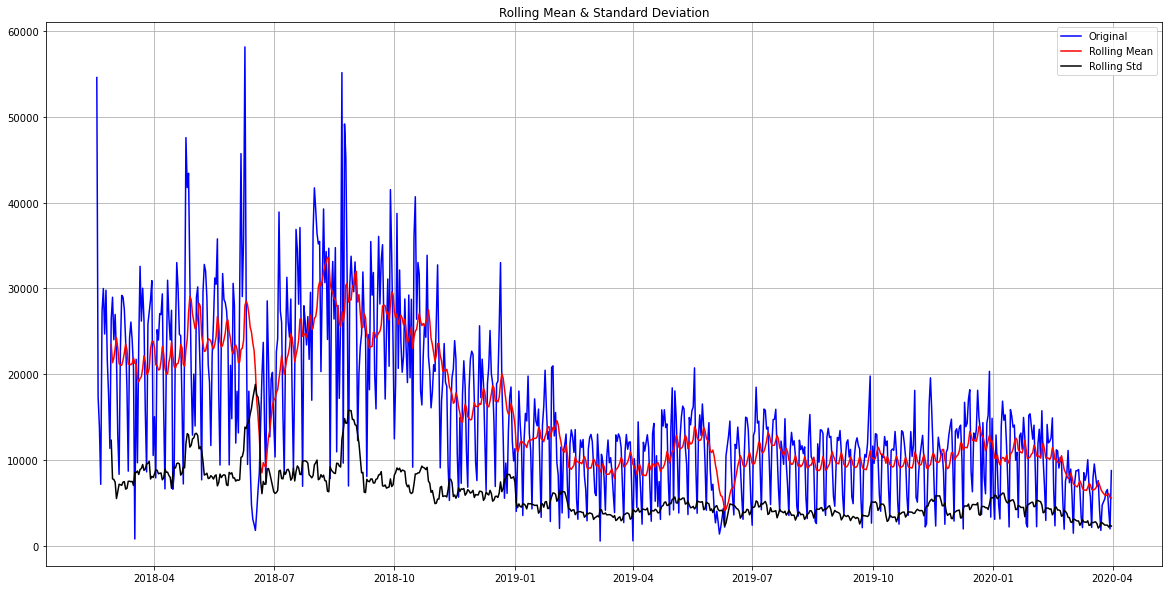

Results of Dickey-Fuller Test:
Test Statistic                  -1.392350
p-value                          0.585938
#Lags Used                      21.000000
Number of Observations Used    752.000000
Critical Value (1%)             -3.439076
Critical Value (5%)             -2.865391
Critical Value (10%)            -2.568821
dtype: float64


In [ ]:
test_stationarity(df)

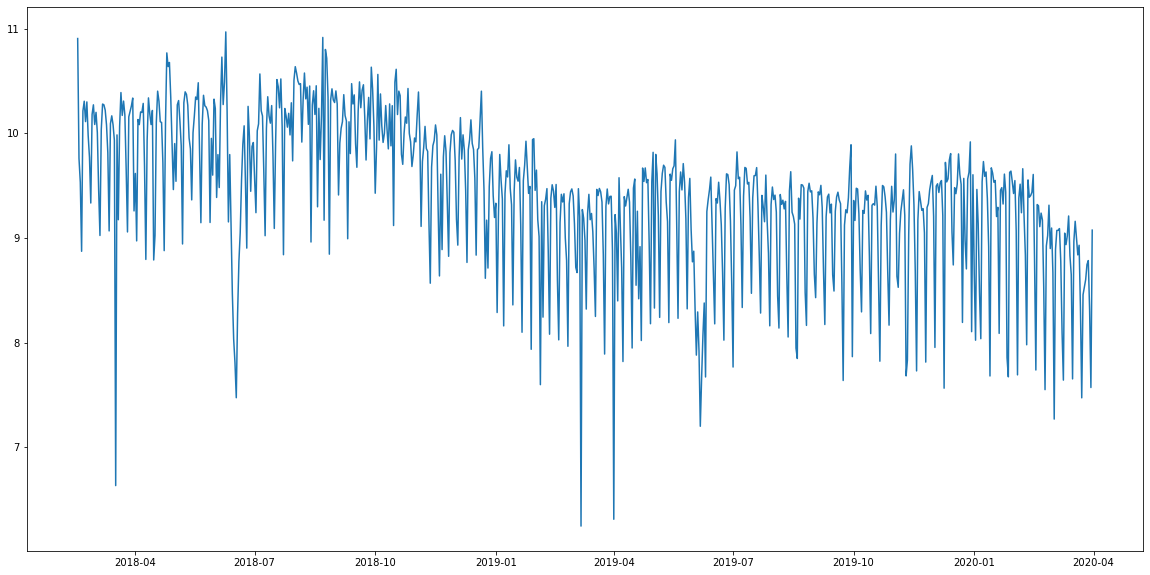

In [ ]:
log_df = np.log(df)
plt.figure(figsize = (20,10))
plt.plot(log_df)
plt.show()

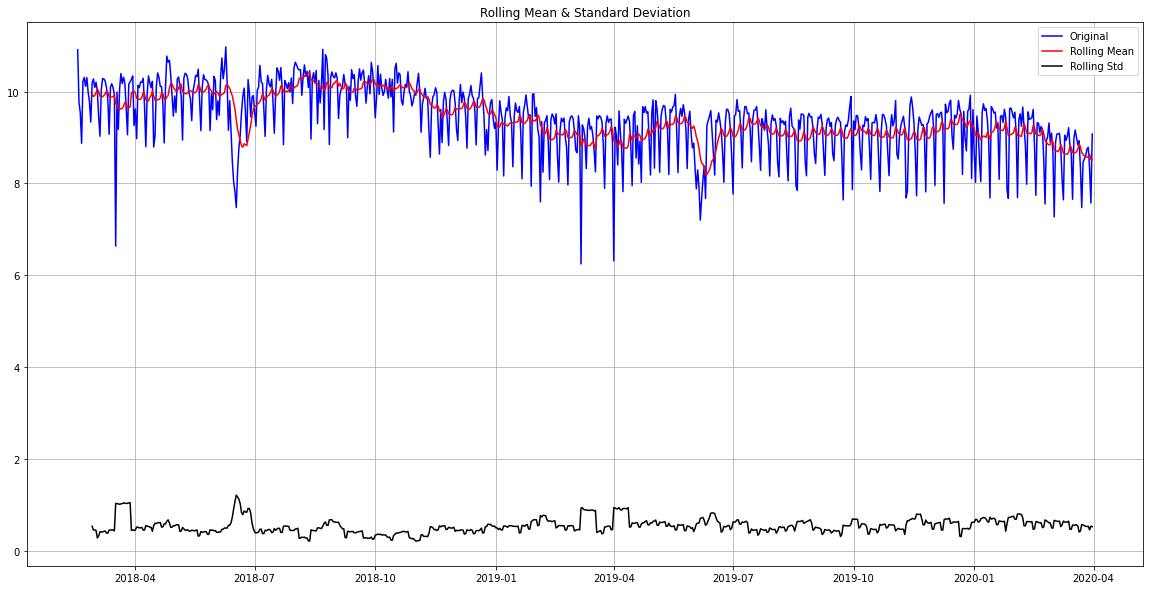

Results of Dickey-Fuller Test:
Test Statistic                  -1.810103
p-value                          0.375457
#Lags Used                      21.000000
Number of Observations Used    752.000000
Critical Value (1%)             -3.439076
Critical Value (5%)             -2.865391
Critical Value (10%)            -2.568821
dtype: float64


In [ ]:
test_stationarity(log_df)

In [ ]:
moving_avg = log_df.rolling(12).mean()

log_df = log_df - moving_avg
log_df.head(12)

,Cargo_Demand
FlightDate,
2018-02-16,NaN
2018-02-17,NaN
2018-02-18,NaN
2018-02-19,NaN
2018-02-20,NaN
2018-02-21,NaN
2018-02-22,NaN
2018-02-23,NaN
2018-02-24,NaN


            Cargo_Demand
FlightDate              
2018-02-27      0.241696
2018-02-28      0.386228
2018-03-01      0.171200
2018-03-02      0.231560
2018-03-03     -0.057233


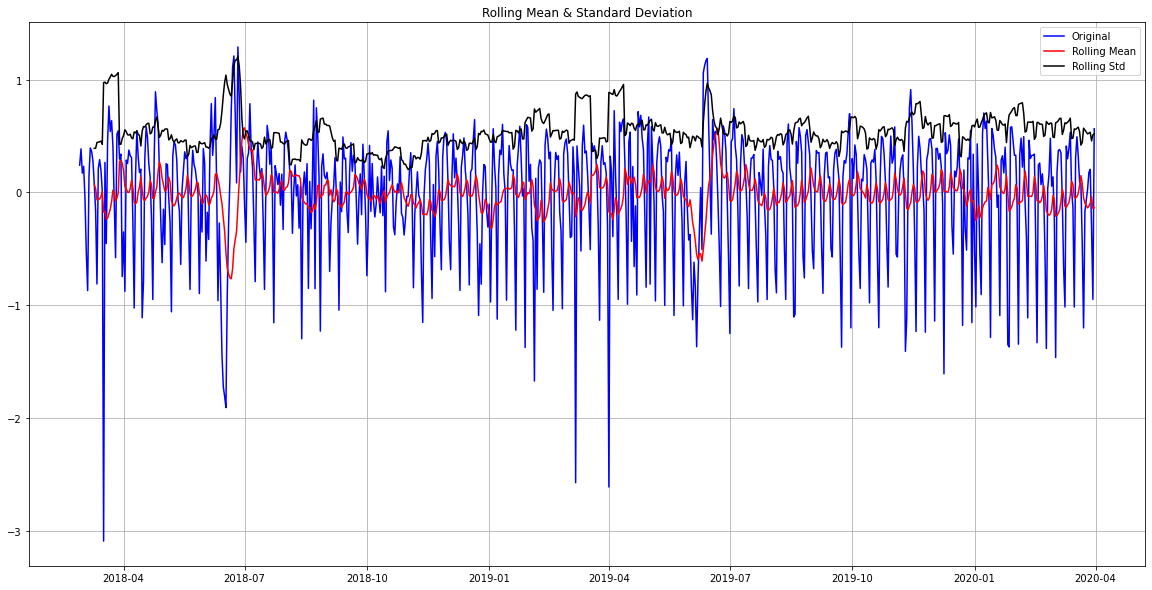

Results of Dickey-Fuller Test:
Test Statistic                -6.905027e+00
p-value                        1.253633e-09
#Lags Used                     2.000000e+01
Number of Observations Used    7.420000e+02
Critical Value (1%)           -3.439194e+00
Critical Value (5%)           -2.865443e+00
Critical Value (10%)          -2.568848e+00
dtype: float64


In [ ]:
log_df.dropna(inplace=True)
print(log_df.head())
test_stationarity(log_df)

In [ ]:
log_df.head()

,Cargo_Demand
FlightDate,
2018-02-27,0.241696
2018-02-28,0.386228
2018-03-01,0.171200
2018-03-02,0.231560
2018-03-03,-0.057233


In [ ]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2018-02-27 to 2020-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cargo_Demand  763 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


## Decomposition

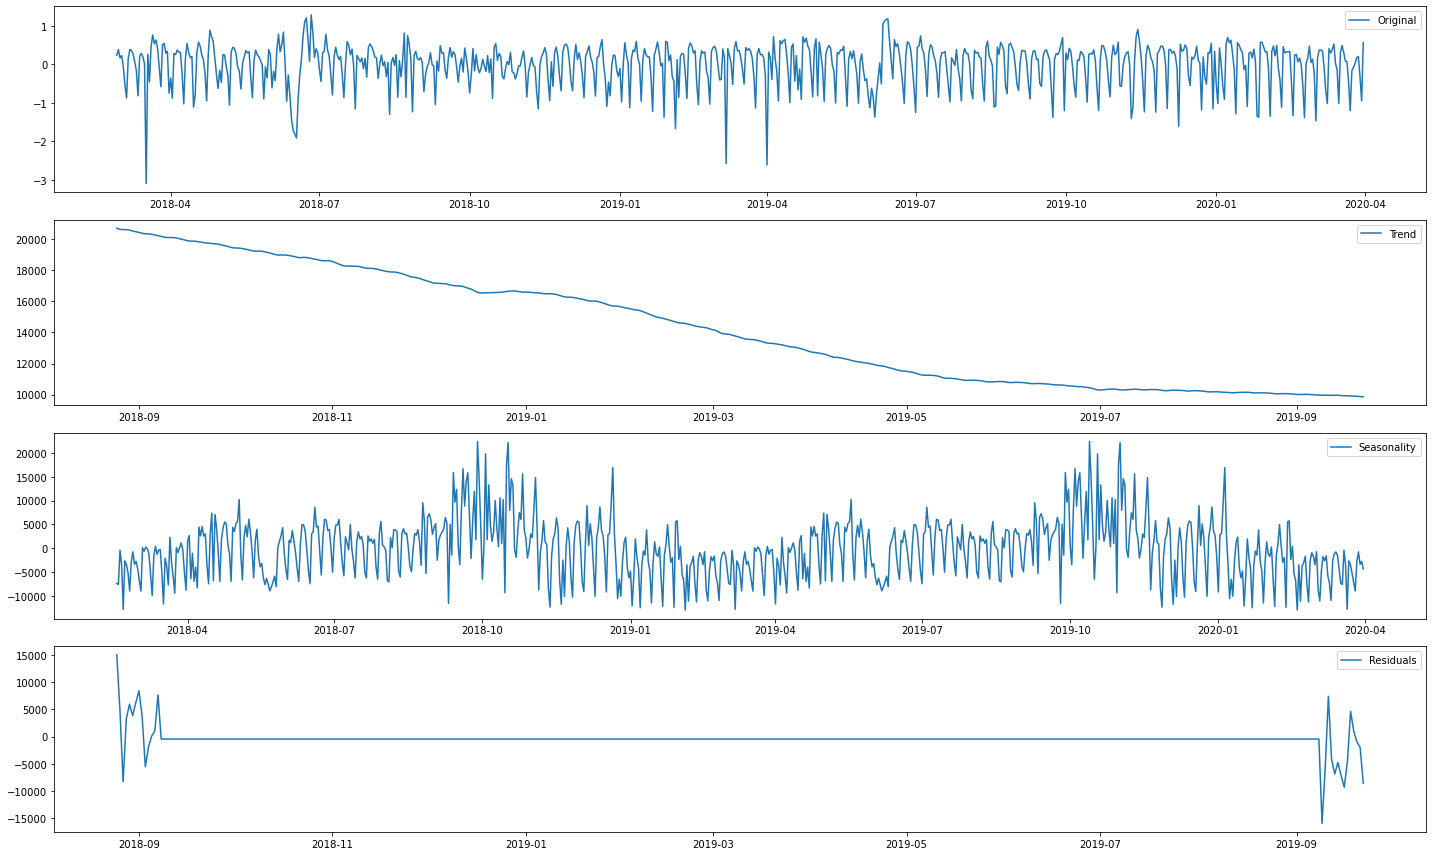

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,period = 380)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(log_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### ACF & PACF

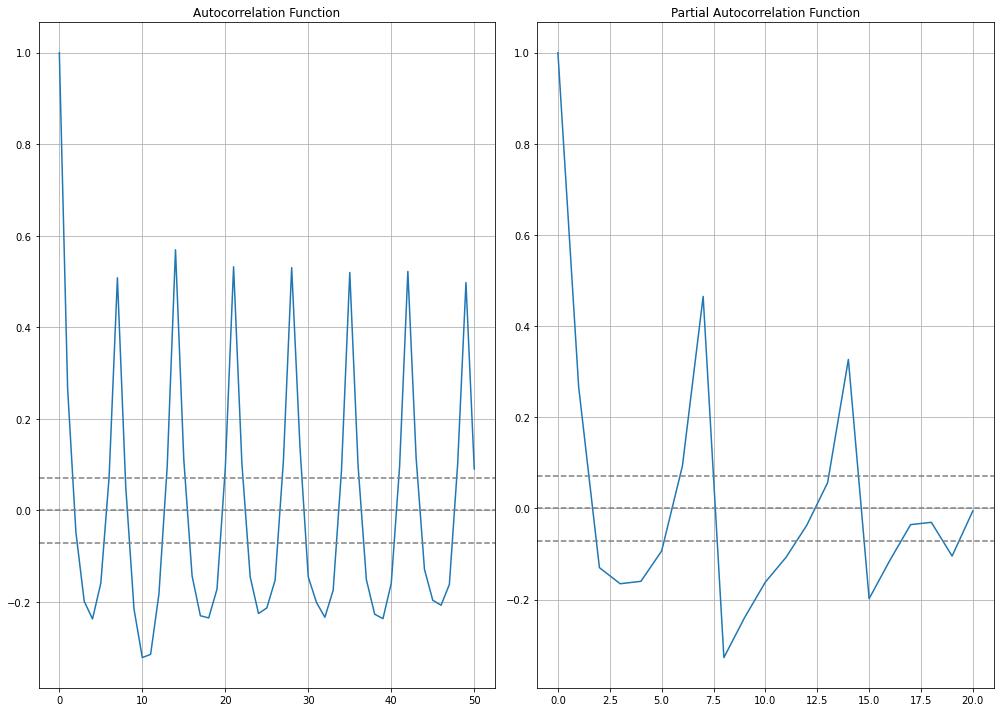

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_df, nlags=50)
lag_pacf = pacf(log_df, nlags=20, method='ols')


#Plot ACF: 
plt.figure(figsize=(14,10))
plt.subplot(121) 
plt.grid()
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.grid()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#checking correlation in terms of percentage
values = pd.DataFrame(log_df.values)

#creating dataframe with 1 lag value
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

#result of correlation
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.266483
t+1  0.266483  1.000000


### Persistence model

0.3946602083954202


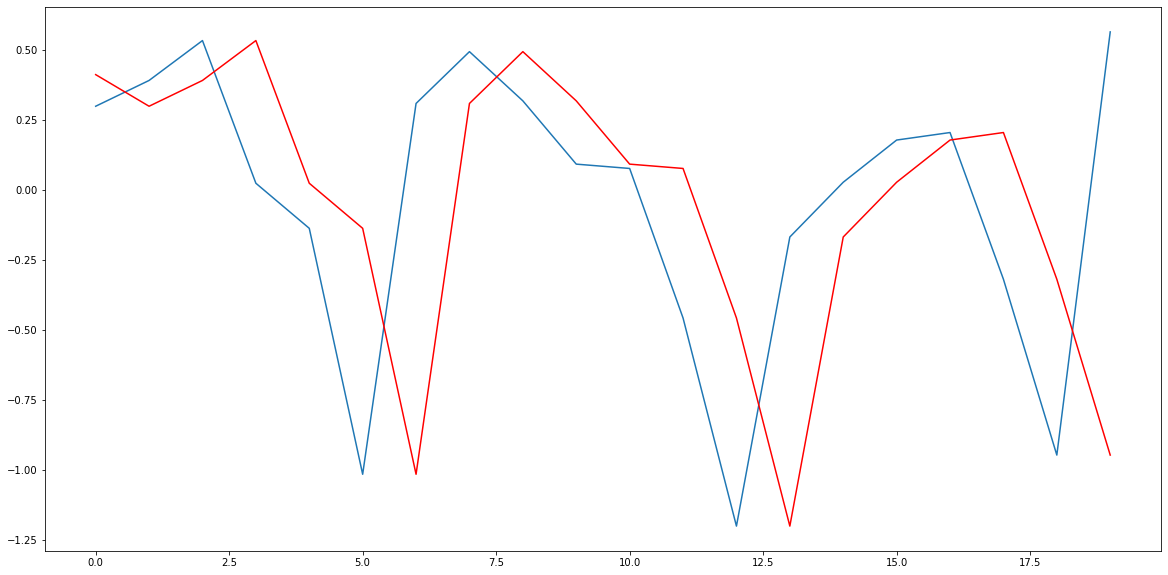

In [ ]:
#importing accuracy checking methods
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#taking values from dataframe
X = dataframe.values

#spliting into test train
train, test = X[1:len(X)-20], X[len(X)-20:]

#training on X and testing on Y
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


# persistence model
def model_persistence(x):
    return(x)

# Validations

predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

#mean-squared error 
test_score = mean_squared_error(test_y , predictions)

print(test_score)

# Actual Vs Predicted plot
plt.figure(figsize=(20,10))
plt.plot(test_y)
plt.plot(predictions , color = 'red')
plt.show()

In [ ]:
#importing necessary packages
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

### AR model

Coefficients: [-0.01200872  0.22442469  0.02338219 -0.0413105  -0.08127858 -0.12050257
 -0.09007854  0.49375357 -0.23350008 -0.19412741 -0.12656797 -0.09482596
 -0.03943828]
predicted=0.454055, expected=0.298664
predicted=0.441525, expected=0.390826
predicted=0.388650, expected=0.533329
predicted=0.023555, expected=0.023572
predicted=-0.488837, expected=-0.137489
predicted=-0.691371, expected=-1.016209
predicted=0.226408, expected=0.308634
predicted=0.357489, expected=0.493706
predicted=0.331332, expected=0.317935
predicted=0.245940, expected=0.091843
predicted=-0.076155, expected=0.076384
predicted=-0.468585, expected=-0.457873
predicted=-0.560276, expected=-1.201367
predicted=0.073196, expected=-0.168478
predicted=0.259552, expected=0.027143
predicted=0.265308, expected=0.177889
predicted=0.190294, expected=0.204750
predicted=-0.068845, expected=-0.319409
predicted=-0.359509, expected=-0.947628
predicted=-0.390682, expected=0.564255
Test RMSE Score: 0.332
Test R2 Score: 0.567


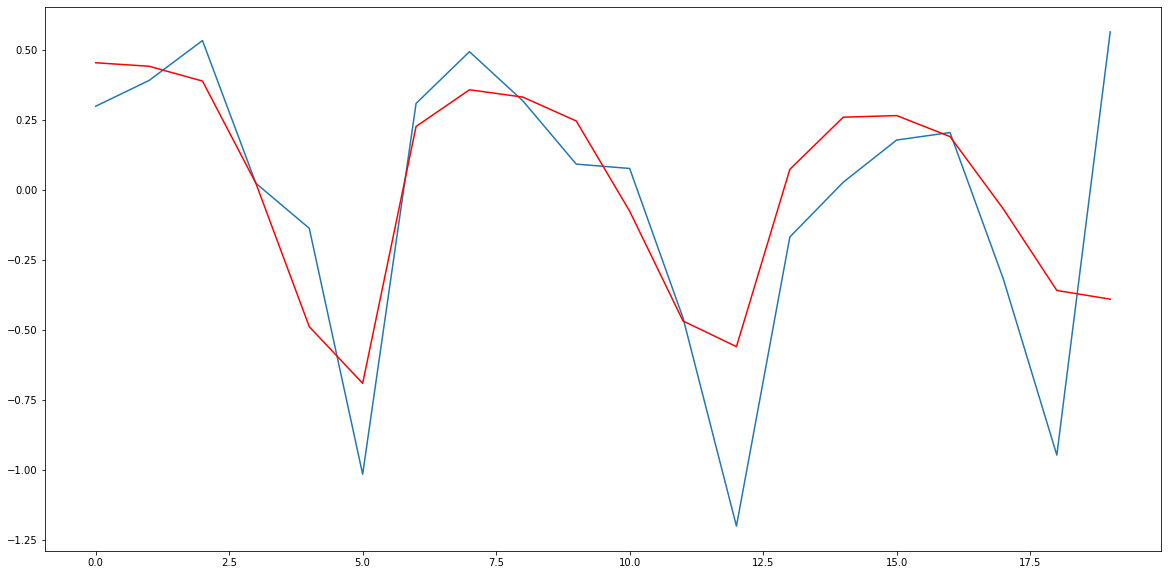

In [ ]:
# split dataset
X = log_df.values
train, test1 = X[1:len(X)-20], X[len(X)-20:]


# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test1)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test1[i]))
rmse = sqrt(mean_squared_error(test1, predictions))
r2 = r2_score(test1, predictions)
print('Test RMSE Score: %.3f' % rmse)
print('Test R2 Score: %.3f' % r2)


# plot results
plt.figure(figsize=(20,10))
plt.plot(test1)
plt.plot(predictions, color='red')
plt.show()

## Forecasting using ARIMA(p,d,q)
### AR model

In [ ]:
#impoting packages
from statsmodels.tsa.arima.model import ARIMA
from random import random
import warnings
warnings.filterwarnings('ignore')

# fit model
model = ARIMA(log_df, order=(1, 0, 0))
model_fit = model.fit()

# make prediction
y_p_ma = model_fit.predict(len(log_df)-10, len(log_df))
print(y_p_ma)

#accuracy score prediction
test_score = r2_score(log_df[len(log_df)-11:] , y_p_ma)
print(test_score)

753    0.017267
754    0.013149
755   -0.129166
756   -0.327217
757   -0.052077
758    0.000032
759    0.040188
760    0.047343
761   -0.092282
762   -0.259626
763    0.143108
Name: predicted_mean, dtype: float64
0.40108238719514366


### MA model

In [ ]:
# fit model
model = ARIMA(log_df, order=(0, 0, 2))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(log_df)-10, len(log_df))
print(yhat)

#accuracy score prediction
test_score = r2_score(log_df[len(log_df)-11:] , yhat)
print(test_score)

753    0.005592
754    0.012239
755   -0.147634
756   -0.338915
757    0.007150
758    0.001614
759    0.043356
760    0.043939
761   -0.112910
762   -0.270221
763    0.212063
Name: predicted_mean, dtype: float64
0.4336988985527217


### ARMA Model

In [ ]:
# fit model
model = ARIMA(log_df, order=(2, 0, 1))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(log_df)-20, len(log_df), typ='levels')
print(yhat)

#accuracy score prediction
test_score = sqrt(mean_squared_error(log_df[len(log_df)-21:] , yhat))
print(test_score)

test_score1 = r2_score(log_df[len(log_df)-21:] , yhat)
print(test_score1)

743    0.295536
744    0.151732
745    0.111240
746    0.089354
747   -0.114171
748   -0.131695
749   -0.329190
750    0.188866
751    0.162807
752    0.032859
753   -0.063011
754   -0.059570
755   -0.197560
756   -0.318152
757    0.129844
758    0.155482
759    0.148464
760    0.099298
761   -0.088479
762   -0.217132
763    0.316390
Name: predicted_mean, dtype: float64
0.35607681696442806
0.4948815818850423


### ARIMA Model

In [ ]:
# fit model
model = ARIMA(log_df, order=(1, 2, 1))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(log_df)-20, len(log_df), typ='levels')
print(yhat)

#accuracy score prediction
test_score = sqrt(mean_squared_error(log_df[len(log_df)-21:] , yhat))
print(test_score)

test_score1 = r2_score(log_df[len(log_df)-21:] , yhat)
print(test_score1)

743    0.005741
744    0.330852
745    0.364811
746    0.493238
747    0.168153
748   -0.092379
749   -0.768454
750   -0.068186
751    0.441436
752    0.368012
753    0.155849
754    0.080445
755   -0.307140
756   -0.992377
757   -0.463053
758   -0.028923
759    0.134844
760    0.196992
761   -0.171306
762   -0.770983
763    0.134668
Name: predicted_mean, dtype: float64
0.19513963177627888
0.8482960920013703


### Decomposition

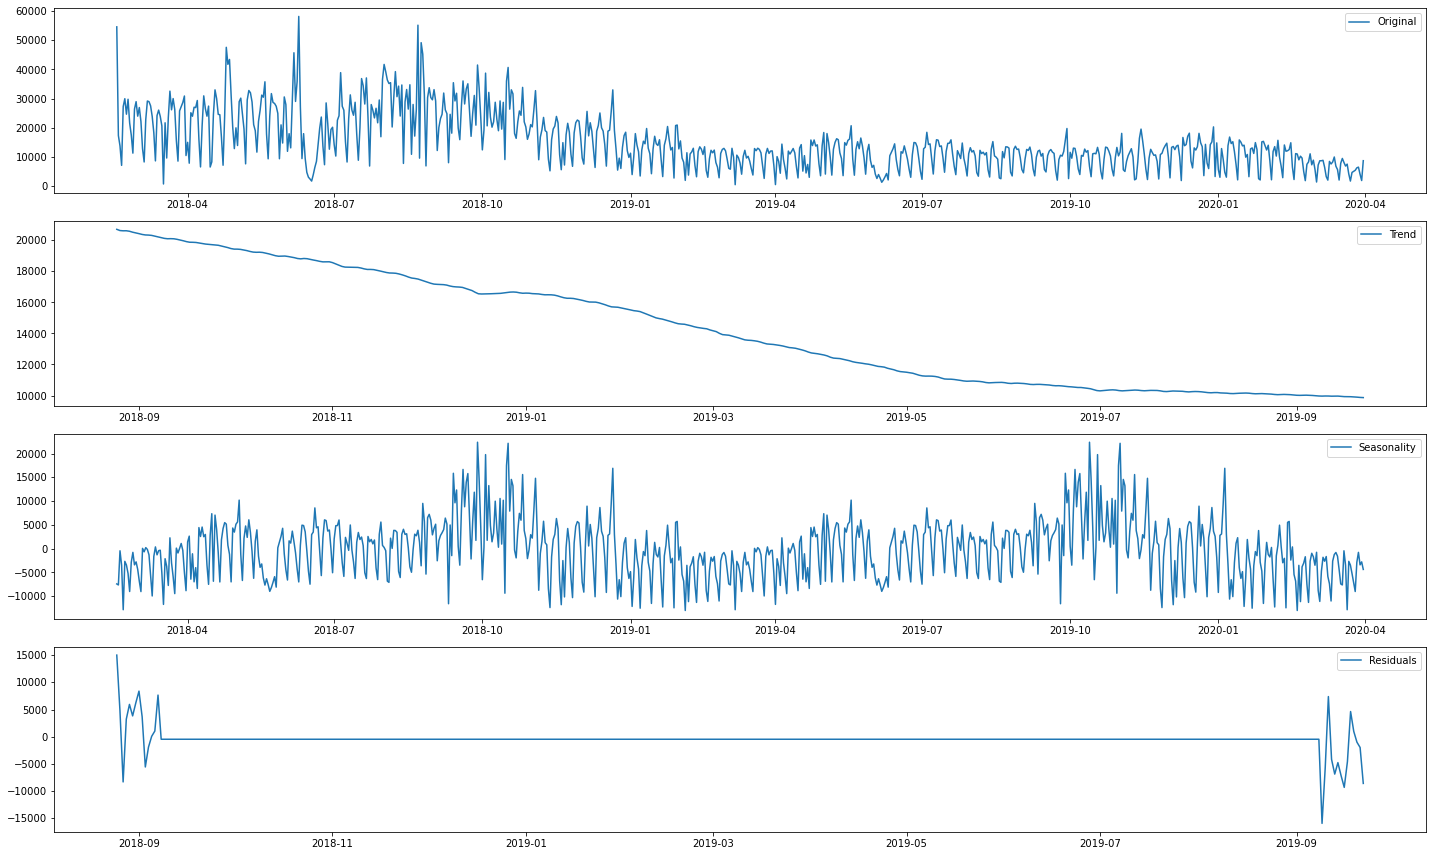

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,period = 380)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(df1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
#checking correlation in terms of percentage
values = pd.DataFrame(df.values)

#creating dataframe with 1 lag value
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

#result of correlation
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.651226
t+1  0.651226  1.000000


In [ ]:
X = df.values
train, test = X[1:len(X)-20], X[len(X)-20:]

### Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#fitting Triple Exp. Sm. Model for train with
#alpha, beta and gamma values
fit = ExponentialSmoothing((train) ,seasonal_periods=21 ,trend='add', seasonal='mul').fit()

#forcesting for test
y_p_ES = fit.forecast(len(test))

#printing predicted
print(y_p_ES)

#r2_score for Accuracy
test_score_3 = sqrt(mean_squared_error(df1[len(df1)-20:] , y_p_ES))
print(test_score_3)

test_score_4 = r2_score(df1[len(df1)-20:] , y_p_ES)
print(test_score_4)

[8357.80681336 7762.91999665 8511.6019602  7826.60657858 4969.73210514
 1772.14368171 7578.96725571 8140.25646515 8094.99305559 8197.77789391
 7171.95155418 5382.45571827 1829.68585642 7532.71406015 7362.42845159
 6891.16031742 7851.91321197 7335.18643266 3538.40297529 1980.74015802]
2030.858058086628
0.27567176096822743


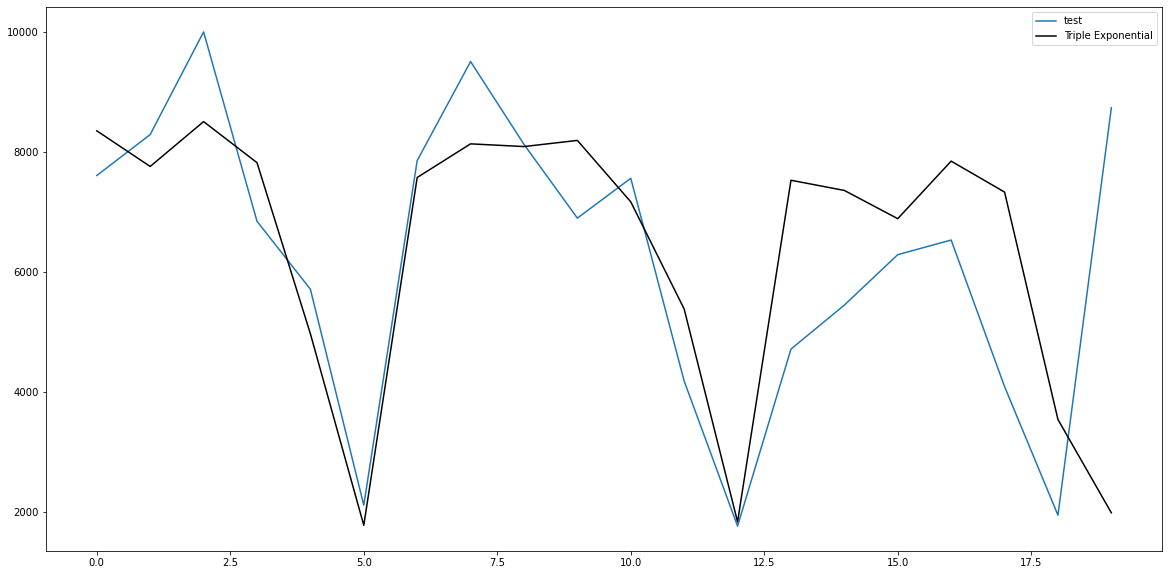

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test,label='test')
plt.plot(y_p_ES, color='black',label='Triple Exponential')
plt.legend(loc='best')
plt.show()

In [ ]:
df

,Cargo_Demand
FlightDate,
2018-02-16,54609.03842
2018-02-17,17363.94526
2018-02-18,13814.45096
2018-02-19,7140.96584
2018-02-20,27314.86600
...,...
2020-03-27,6290.48158
2020-03-28,6534.48634
2020-03-29,4088.32328


In [ ]:
df=df.reset_index()

In [ ]:
df

,FlightDate,Cargo_Demand
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600
...,...,...
769,2020-03-27,6290.48158
770,2020-03-28,6534.48634
771,2020-03-29,4088.32328
772,2020-03-30,1941.32808


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


### Creating Yearly, monthly and weekly column

In [ ]:
df1 = df
df1['Year'] = df1['FlightDate'].dt.year
df1['Month'] = df1['FlightDate'].dt.month
df1['Week'] = df1['FlightDate'].dt.weekday

In [ ]:
df1

,FlightDate,Cargo_Demand,Year,Month,Week
0,2018-02-16,54609.03842,2018,2,4
1,2018-02-17,17363.94526,2018,2,5
2,2018-02-18,13814.45096,2018,2,6
3,2018-02-19,7140.96584,2018,2,0
4,2018-02-20,27314.86600,2018,2,1
...,...,...,...,...,...
769,2020-03-27,6290.48158,2020,3,4
770,2020-03-28,6534.48634,2020,3,5
771,2020-03-29,4088.32328,2020,3,6
772,2020-03-30,1941.32808,2020,3,0


In [ ]:
df1.set_index('FlightDate',inplace=True)
df1

,Cargo_Demand,Year,Month,Week
FlightDate,,,,
2018-02-16,54609.03842,2018,2,4
2018-02-17,17363.94526,2018,2,5
2018-02-18,13814.45096,2018,2,6
2018-02-19,7140.96584,2018,2,0
2018-02-20,27314.86600,2018,2,1
...,...,...,...,...
2020-03-27,6290.48158,2020,3,4
2020-03-28,6534.48634,2020,3,5
2020-03-29,4088.32328,2020,3,6


### Creating Dummies of year,month and week columns

In [ ]:
df1 = pd.get_dummies(df1, columns=['Year','Month','Week'],drop_first=True)
df1

,Cargo_Demand,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
FlightDate,,,,,,,,,,,,,,,,,,,,
2018-02-16,54609.03842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-02-17,17363.94526,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2018-02-18,13814.45096,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-02-19,7140.96584,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-20,27314.86600,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,6290.48158,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-03-28,6534.48634,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2020-03-29,4088.32328,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df1.drop('Cargo_Demand',axis=1)
y=df1.Cargo_Demand

In [ ]:
y=np.log(y)

In [ ]:
X

,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
FlightDate,,,,,,,,,,,,,,,,,,,
2018-02-16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-02-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2018-02-18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-02-19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-03-28,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2020-03-29,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y

FlightDate
2018-02-16    10.907955
2018-02-17     9.762151
2018-02-18     9.533470
2018-02-19     8.873603
2018-02-20    10.215186
                ...    
2020-03-27     8.746793
2020-03-28     8.784849
2020-03-29     8.315890
2020-03-30     7.571128
2020-03-31     9.075963
Name: Cargo_Demand, Length: 774, dtype: float64

#### Split test and train

In [ ]:
train_X, test_X = X[1:len(X)-80], X[len(X)-80:]
train_y, test_y = y[1:len(X)-80], y[len(X)-80:]

In [ ]:
train_X

,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
FlightDate,,,,,,,,,,,,,,,,,,,
2018-02-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2018-02-18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-02-19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2018-02-21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_y

FlightDate
2020-01-11    9.379392
2020-01-12    8.916502
2020-01-13    7.681405
2020-01-14    9.671568
2020-01-15    9.622800
                ...   
2020-03-27    8.746793
2020-03-28    8.784849
2020-03-29    8.315890
2020-03-30    7.571128
2020-03-31    9.075963
Name: Cargo_Demand, Length: 80, dtype: float64

## Linear model

In [ ]:
from sklearn import linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression() 
reg.fit(train_X, train_y) 
pre_y=reg.predict(test_X)

In [ ]:
pre_y

array([9.11936983, 8.76112393, 8.04506767, 9.14019628, 9.20224759,
       9.12165937, 9.28755382, 9.11936983, 8.76112393, 8.04506767,
       9.14019628, 9.20224759, 9.12165937, 9.28755382, 9.11936983,
       8.76112393, 8.04506767, 9.14019628, 9.20224759, 9.12165937,
       9.28755382, 8.85939509, 8.50114918, 7.78509293, 8.88022153,
       8.94227285, 8.86168463, 9.02757907, 8.85939509, 8.50114918,
       7.78509293, 8.88022153, 8.94227285, 8.86168463, 9.02757907,
       8.85939509, 8.50114918, 7.78509293, 8.88022153, 8.94227285,
       8.86168463, 9.02757907, 8.85939509, 8.50114918, 7.78509293,
       8.88022153, 8.94227285, 8.86168463, 9.02757907, 8.85939509,
       8.43305903, 7.71700278, 8.81213138, 8.8741827 , 8.79359448,
       8.95948892, 8.79130493, 8.43305903, 7.71700278, 8.81213138,
       8.8741827 , 8.79359448, 8.95948892, 8.79130493, 8.43305903,
       7.71700278, 8.81213138, 8.8741827 , 8.79359448, 8.95948892,
       8.79130493, 8.43305903, 7.71700278, 8.81213138, 8.79359

In [ ]:
print("Mean squared error:",mean_squared_error(test_y,pre_y))

Mean squared error: 0.11732671778572563


In [ ]:
r2_score(test_y, pre_y)

0.7090823588243181

In [ ]:
test_y1=test_y.reset_index()
test_y1=test_y1.iloc[:,1]

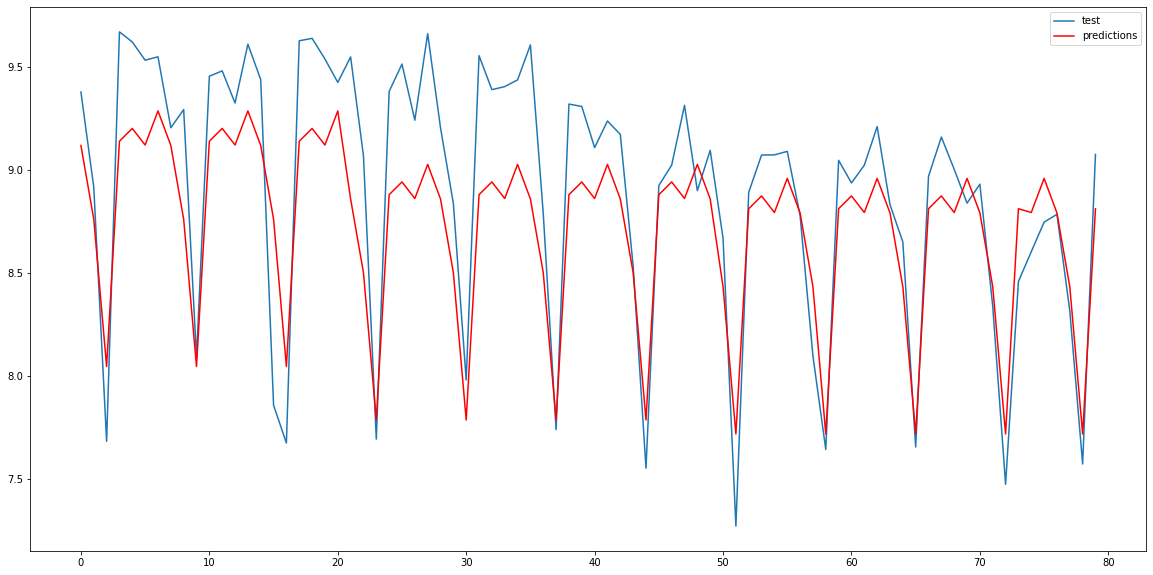

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_y1,label='test')
plt.plot(pre_y, color='red',label='predictions')
plt.legend(loc='best')
plt.show()

## Fbprophet Implementation

In [1]:
from fbprophet import Prophet

In [2]:
from google.colab import drive
drive.mount('colab')

Mounted at colab


In [5]:
df = pd.read_excel('/content/colab/MyDrive/colab/fbprophet/Sample Demand Data.xlsx')

In [6]:
df.head()

,FlightDate,Cargo_Demand
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [8]:
df["FlightDate"] = pd.to_datetime(df["FlightDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [9]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600


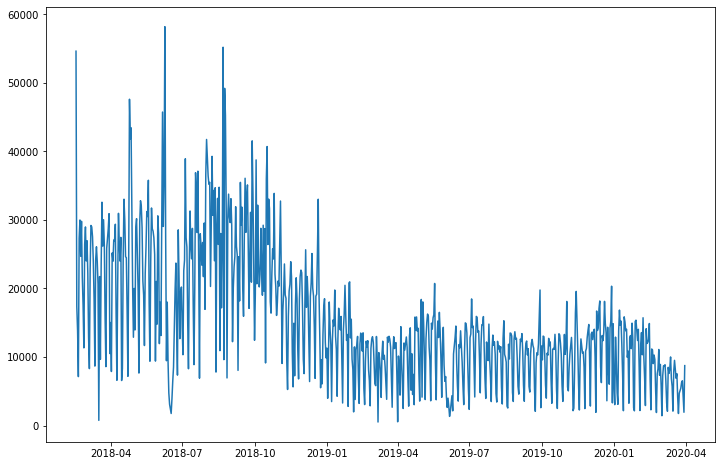

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df.set_index(['ds']))

In [11]:
model=Prophet()

In [12]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Create future dataFrame

In [44]:
### Create future hours
future_dates=model.make_future_dataframe(periods=2400,freq = "H")

In [45]:
future_dates.tail(30)

,ds
3144,2020-07-07 19:00:00
3145,2020-07-07 20:00:00
3146,2020-07-07 21:00:00
3147,2020-07-07 22:00:00
3148,2020-07-07 23:00:00
3149,2020-07-08 00:00:00
3150,2020-07-08 01:00:00
3151,2020-07-08 02:00:00
3152,2020-07-08 03:00:00
3153,2020-07-08 04:00:00


### prediction

In [46]:
prediction=model.predict(future_dates)

In [47]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-16,28177.871631,22161.510997,35708.755405,28177.871631,28177.871631,482.675824,482.675824,482.675824,4184.393747,4184.393747,4184.393747,-3701.717924,-3701.717924,-3701.717924,0.0,0.0,0.0,28660.547455
1,2018-02-17,28140.006257,19261.322561,32342.899686,28140.006257,28140.006257,-2215.009844,-2215.009844,-2215.009844,1638.852671,1638.852671,1638.852671,-3853.862515,-3853.862515,-3853.862515,0.0,0.0,0.0,25924.996413
2,2018-02-18,28102.140882,14635.597050,27196.331957,28102.140882,28102.140882,-7058.374116,-7058.374116,-7058.374116,-3055.227836,-3055.227836,-3055.227836,-4003.146280,-4003.146280,-4003.146280,0.0,0.0,0.0,21043.766766
3,2018-02-19,28064.275508,7842.273667,21374.522634,28064.275508,28064.275508,-13318.278655,-13318.278655,-13318.278655,-9169.482724,-9169.482724,-9169.482724,-4148.795932,-4148.795932,-4148.795932,0.0,0.0,0.0,14745.996853
4,2018-02-20,28026.410133,17996.839989,31442.760257,28026.410133,28026.410133,-3153.153508,-3153.153508,-3153.153508,1136.881859,1136.881859,1136.881859,-4290.035366,-4290.035366,-4290.035366,0.0,0.0,0.0,24873.256626


### Plotting the Forecasts

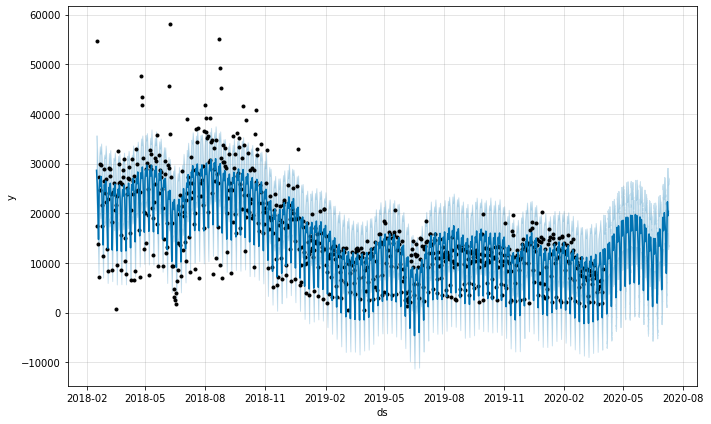

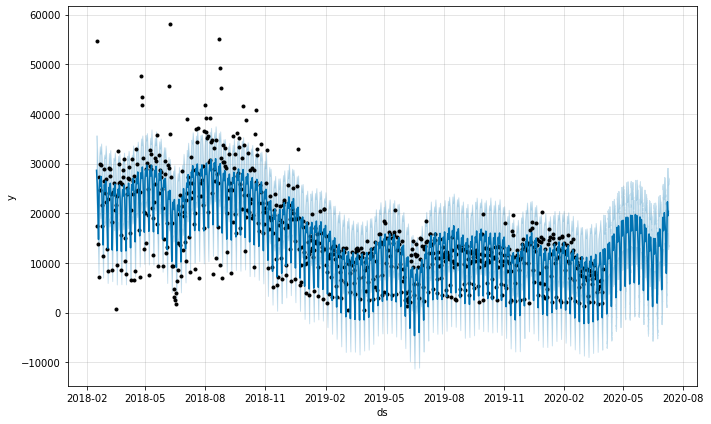

In [48]:
model.plot(prediction)

### Plotting the Forecast Components

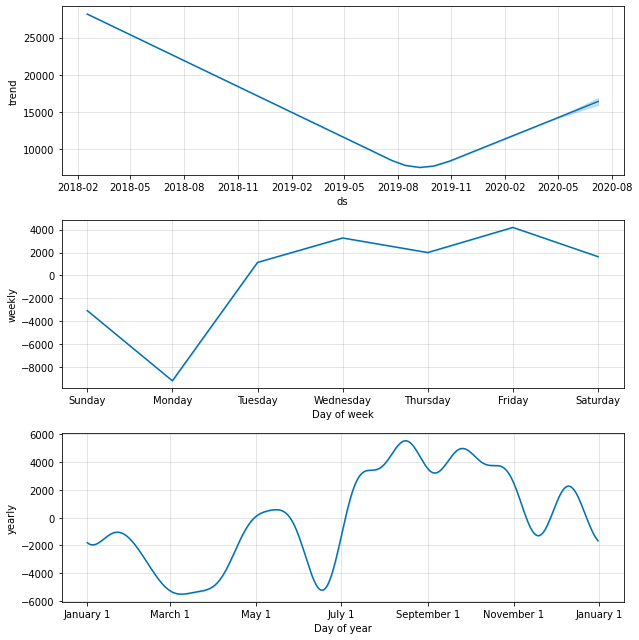

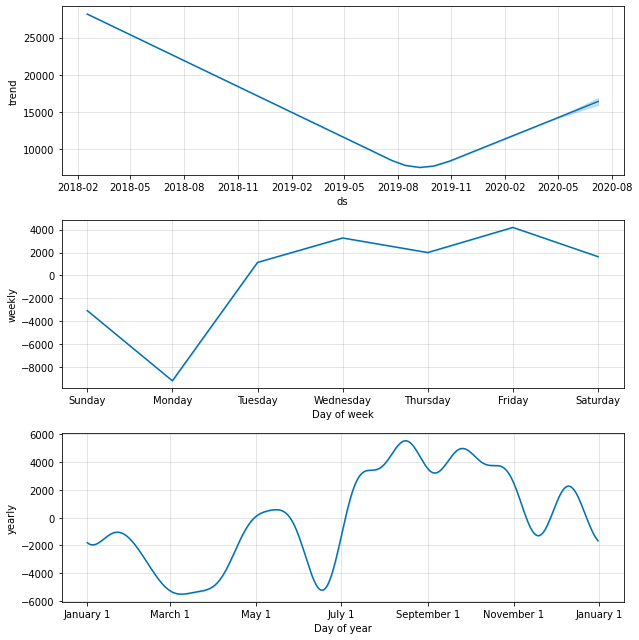

In [49]:
model.plot_components(prediction)

### Cross Validation

In [50]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '720 hours')
df_cv.tail()

INFO:fbprophet:Making 26 forecasts with cutoffs between 2019-02-20 00:00:00 and 2020-03-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
774,2020-03-27,13647.487760,6964.473927,20113.930585,6290.48158,2020-03-01
775,2020-03-28,11096.218478,4571.505173,18180.521887,6534.48634,2020-03-01
776,2020-03-29,6370.821745,-260.376175,12894.749162,4088.32328,2020-03-01
777,2020-03-30,139.948461,-6459.616268,7066.346585,1941.32808,2020-03-01
778,2020-03-31,10731.418052,3958.433891,16907.677714,8742.60288,2020-03-01


### Performance Metrics

In [51]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.488613e+07,3858.255164,3163.419872,0.613319,0.243153,0.910090
1,4 days,1.738541e+07,4169.581928,3406.184398,0.555364,0.259684,0.884615
2,5 days,2.043709e+07,4520.739973,3596.452498,0.566049,0.261583,0.845155
3,6 days,2.196950e+07,4687.163663,3721.317686,0.542431,0.330552,0.846154
4,7 days,2.313588e+07,4809.977622,3781.045488,0.516593,0.315426,0.834166


In [52]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.488613e+07,3858.255164,3163.419872,0.613319,0.243153,0.910090
1,4 days,1.738541e+07,4169.581928,3406.184398,0.555364,0.259684,0.884615
2,5 days,2.043709e+07,4520.739973,3596.452498,0.566049,0.261583,0.845155
3,6 days,2.196950e+07,4687.163663,3721.317686,0.542431,0.330552,0.846154
4,7 days,2.313588e+07,4809.977622,3781.045488,0.516593,0.315426,0.834166


### Visualizing Performance Metrics

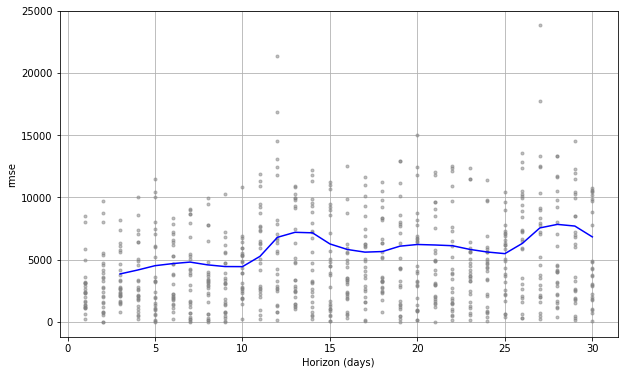

In [53]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

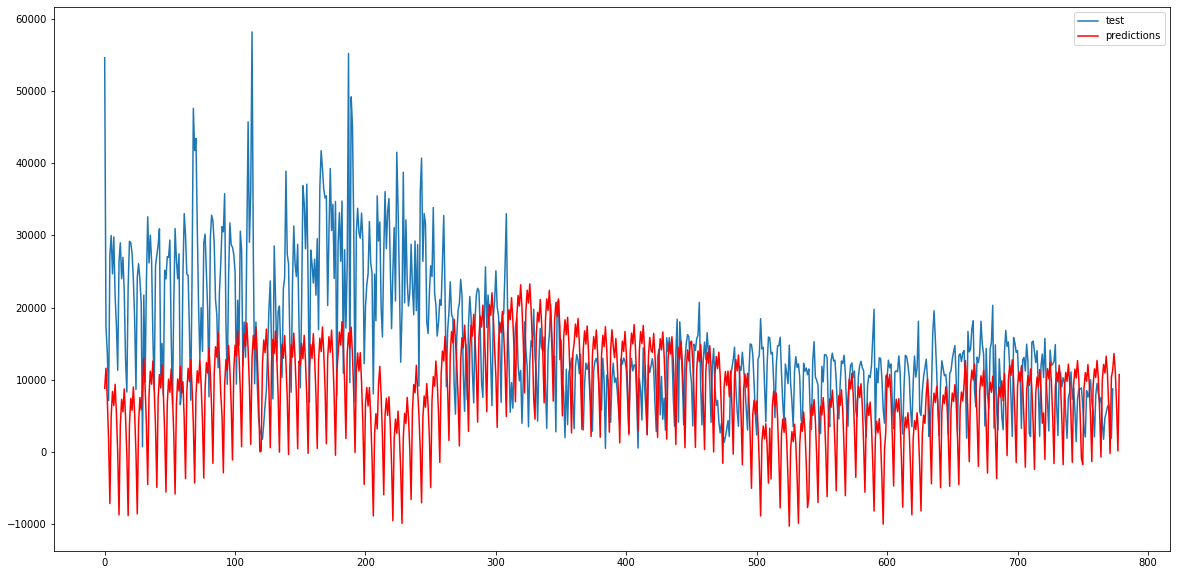

In [54]:
df_cv1 = df_cv.iloc[:,1]
df1 = df.iloc[:,1]
plt.figure(figsize=(20,10))
plt.plot(df1,label='test')
plt.plot(df_cv1, color='red',label='predictions')
plt.legend(loc='best')
plt.show()